In [1]:
pip install NeuroLab

Note: you may need to restart the kernel to use updated packages.


# Building Neural Networks

In [119]:
import matplotlib.pyplot as plt
import neurolab as nl

In [120]:
input = [[0,0],[0,1],[1,0],[1,1]]
target = [[0],[0],[0],[1]]
#supervised learning hence we have to give the value 

In [121]:
net = nl.net.newp([[0,1],[0,1]],1) # is a function used to create a perceptron neural network.
#two inputs and 1 neuron

In [122]:
error_progress = net.train(input, target, epochs = 50, show=10, lr=0.1)
#using delta rule we will train the network
#also here net.train do trains the specified neural net by giving
#the inputi as input and minimizing the discrepancy between the output
#i and the actual output of the net, using an automatically chosen loss function

The goal of learning is reached


#  the delta rule is a gradient descent learning rule for updating the weights of the inputs to artificial neurons in a single-layer neural network

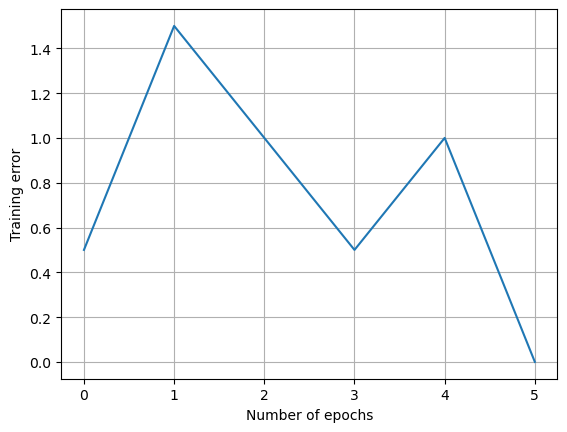

In [123]:
plt.figure()
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel('Training error')
plt.grid()
plt.show()

# Single - Layer Neural Networks

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [8]:
input_data = np.loadtxt("neural_simple.txt")

In [9]:
data = input_data[:,0:2]
labels = input_data[:,2:]

Text(0.5, 1.0, 'Input data')

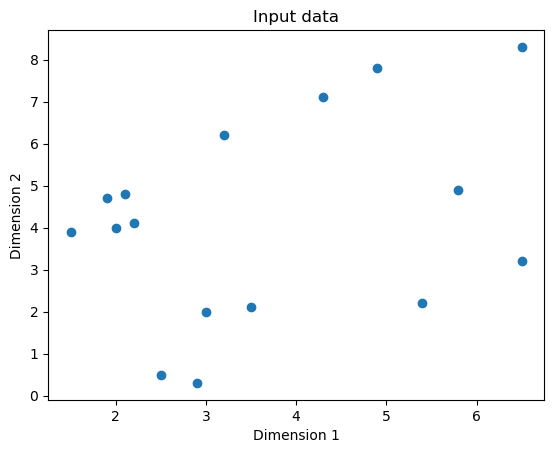

In [10]:
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Input data")

In [11]:
dim1_min, dim1_max = data[:,0].min(),data[:,0].max()
dim2_min, dim2_max = data[:,1].min(),data[:,1].max()

In [12]:
nn_output_layer = labels.shape[1]

In [13]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
neural_net = nl.net.newp([dim1, dim2], nn_output_layer)

In [14]:
error = neural_net.train(data, labels, epochs = 200, show = 20, lr = 0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
The maximum number of train epochs is reached


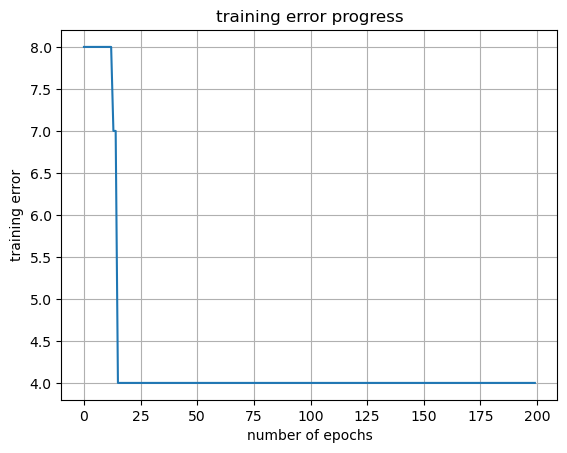

In [15]:
plt.figure()
plt.plot(error)
plt.xlabel("number of epochs")
plt.ylabel("training error")
plt.title("training error progress")
plt.grid()
plt.show()

In [16]:


print('\nTest Results:')
data_test = [[1.5, 3.2], [3.6, 1.7], [3.6, 5.7],[1.6, 3.9]]
for item in data_test:
    print(item, '-->', neural_net.sim([item])[0])



Test Results:
[1.5, 3.2] --> [1. 0.]
[3.6, 1.7] --> [1. 0.]
[3.6, 5.7] --> [1. 1.]
[1.6, 3.9] --> [1. 0.]


# Multi-Layer Neural Networks

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [55]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8a
y /= np.linalg.norm(y)

In [45]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points,1)

Text(0.5, 1.0, 'data-points')

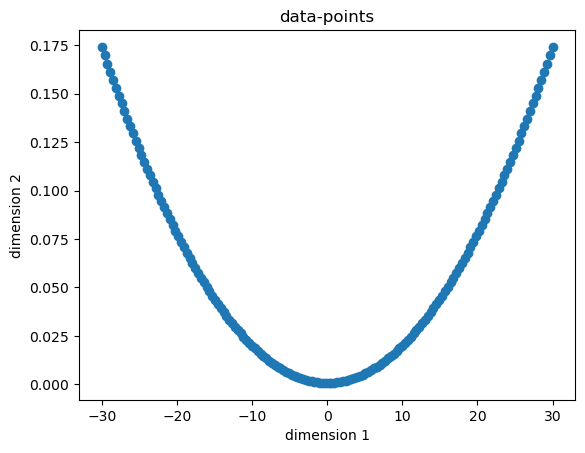

In [46]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title("data-points")

In [47]:
neural_net = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [48]:
neural_net.trainf = nl.train.train_gd

In [49]:
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

Epoch: 100; Error: 2.3613895946933745;
Epoch: 200; Error: 0.74252291683036;
Epoch: 300; Error: 0.9434476564430243;
Epoch: 400; Error: 0.10799561100108994;
Epoch: 500; Error: 0.07943737562500676;
Epoch: 600; Error: 0.08351086192350882;
Epoch: 700; Error: 0.16898086158848397;
Epoch: 800; Error: 0.35870700735507555;
Epoch: 900; Error: 0.10130682141906194;
Epoch: 1000; Error: 0.12990553866166138;
The maximum number of train epochs is reached


In [52]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

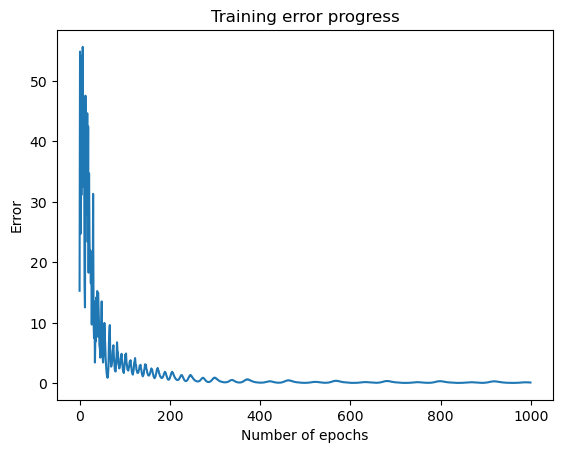

In [53]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel("Error")
plt.title("Training error progress")

In [70]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

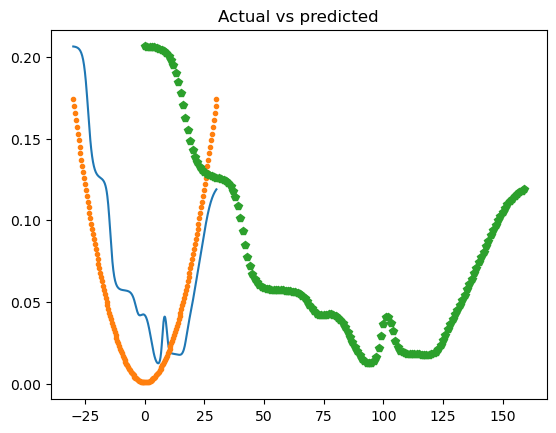

In [74]:
x_dense = np.linspace(min_val, max_val, num_points * 3)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size,1)
plt.figure()
plt.plot(x_dense, y_dense_pred,'-',x,y,'.',y_pred,'p')
plt.title('Actual vs predicted')
plt.show()